<h3>1. Import module yang dibutuhkan</h3>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os
from google.colab.patches import cv2_imshow

<h3>2. Load Dataset</h3>

In [8]:
!wget --no-check-certificate https://github.com/farkhan777/Dataset-Daun/archive/refs/heads/main.zip -O /tmp/Dataset-Daun.zip

--2021-12-08 22:53:37--  https://github.com/farkhan777/Dataset-Daun/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/farkhan777/Dataset-Daun/zip/refs/heads/main [following]
--2021-12-08 22:53:37--  https://codeload.github.com/farkhan777/Dataset-Daun/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/Dataset-Daun.zip’

/tmp/Dataset-Daun.z     [ <=>                ]  16.82M  --.-KB/s    in 0.1s    

2021-12-08 22:53:38 (165 MB/s) - ‘/tmp/Dataset-Daun.zip’ saved [17640971]



In [9]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/Dataset-Daun-main/Dataset-daun.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Dataset')
zip_ref.close()

In [10]:
os.listdir('/tmp/Dataset')

['Pandan', 'Seledri']

In [11]:
print('total pandan images: ', len(os.listdir('/tmp/Dataset/Pandan')))
print('total seledri images: ', len(os.listdir('/tmp/Dataset/Seledri')))

total pandan images:  50
total seledri images:  50


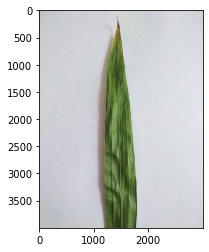

In [13]:
%matplotlib inline
img = image.load_img('/tmp/Dataset/Pandan/037.jpg')
imgplot = plt.imshow(img)

In [14]:
imagePaths = '/tmp/Dataset/'
label_list = ['Pandan', 'Seledri']
data = []
labels = []

In [17]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

/tmp/Dataset/Pandan/030.jpg
/tmp/Dataset/Pandan/014.jpg
/tmp/Dataset/Pandan/006.jpg
/tmp/Dataset/Pandan/005.jpg
/tmp/Dataset/Pandan/011.jpg
/tmp/Dataset/Pandan/020.jpg
/tmp/Dataset/Pandan/002.jpg
/tmp/Dataset/Pandan/046.jpg
/tmp/Dataset/Pandan/021.jpg
/tmp/Dataset/Pandan/007.jpg
/tmp/Dataset/Pandan/035.jpg
/tmp/Dataset/Pandan/013.jpg
/tmp/Dataset/Pandan/024.jpg
/tmp/Dataset/Pandan/036.jpg
/tmp/Dataset/Pandan/047.jpg
/tmp/Dataset/Pandan/019.jpg
/tmp/Dataset/Pandan/040.jpg
/tmp/Dataset/Pandan/048.jpg
/tmp/Dataset/Pandan/009.jpg
/tmp/Dataset/Pandan/044.jpg
/tmp/Dataset/Pandan/028.jpg
/tmp/Dataset/Pandan/050.jpg
/tmp/Dataset/Pandan/008.jpg
/tmp/Dataset/Pandan/023.jpg
/tmp/Dataset/Pandan/012.jpg
/tmp/Dataset/Pandan/042.jpg
/tmp/Dataset/Pandan/022.jpg
/tmp/Dataset/Pandan/049.jpg
/tmp/Dataset/Pandan/027.jpg
/tmp/Dataset/Pandan/003.jpg
/tmp/Dataset/Pandan/017.jpg
/tmp/Dataset/Pandan/034.jpg
/tmp/Dataset/Pandan/039.jpg
/tmp/Dataset/Pandan/032.jpg
/tmp/Dataset/Pandan/001.jpg
/tmp/Dataset/Pandan/

In [18]:
np.array(data).shape

(100, 32, 32, 3)

In [19]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [20]:
print(labels)

['Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri' 'Seledri'
 'Seledri' 'Seledri' 'Seledri']


In [21]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [23]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build CNN Architecture</h3>

In [24]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [26]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [27]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [28]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 146ms/step - loss: 0.8075 - accuracy: 0.5250 - val_loss: 0.7261 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 60ms/step - loss: 0.6941 - accuracy: 0.5625 - val_loss: 0.5479 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 56ms/step - loss: 0.5720 - accuracy: 0.7375 - val_loss: 0.6255 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 58ms/step - loss: 0.5490 - accuracy: 0.6250 - val_loss: 0.4244 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 60ms/step - loss: 0.3836 - accuracy: 0.9500 - val_loss: 0.3152 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 64ms/step - loss: 0.2972 - accuracy: 1.0000 - val_loss: 0.2402 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 59ms/step - loss: 0.2046 - accuracy: 0.9750 - val_loss: 0.1465 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

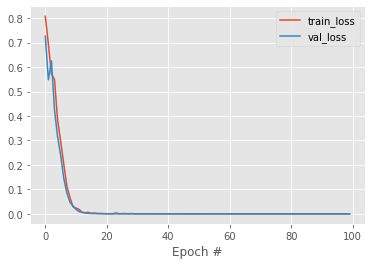

In [29]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [30]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

      Pandan       1.00      1.00      1.00        12
     Seledri       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [44]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Seledri/011.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9999931]]


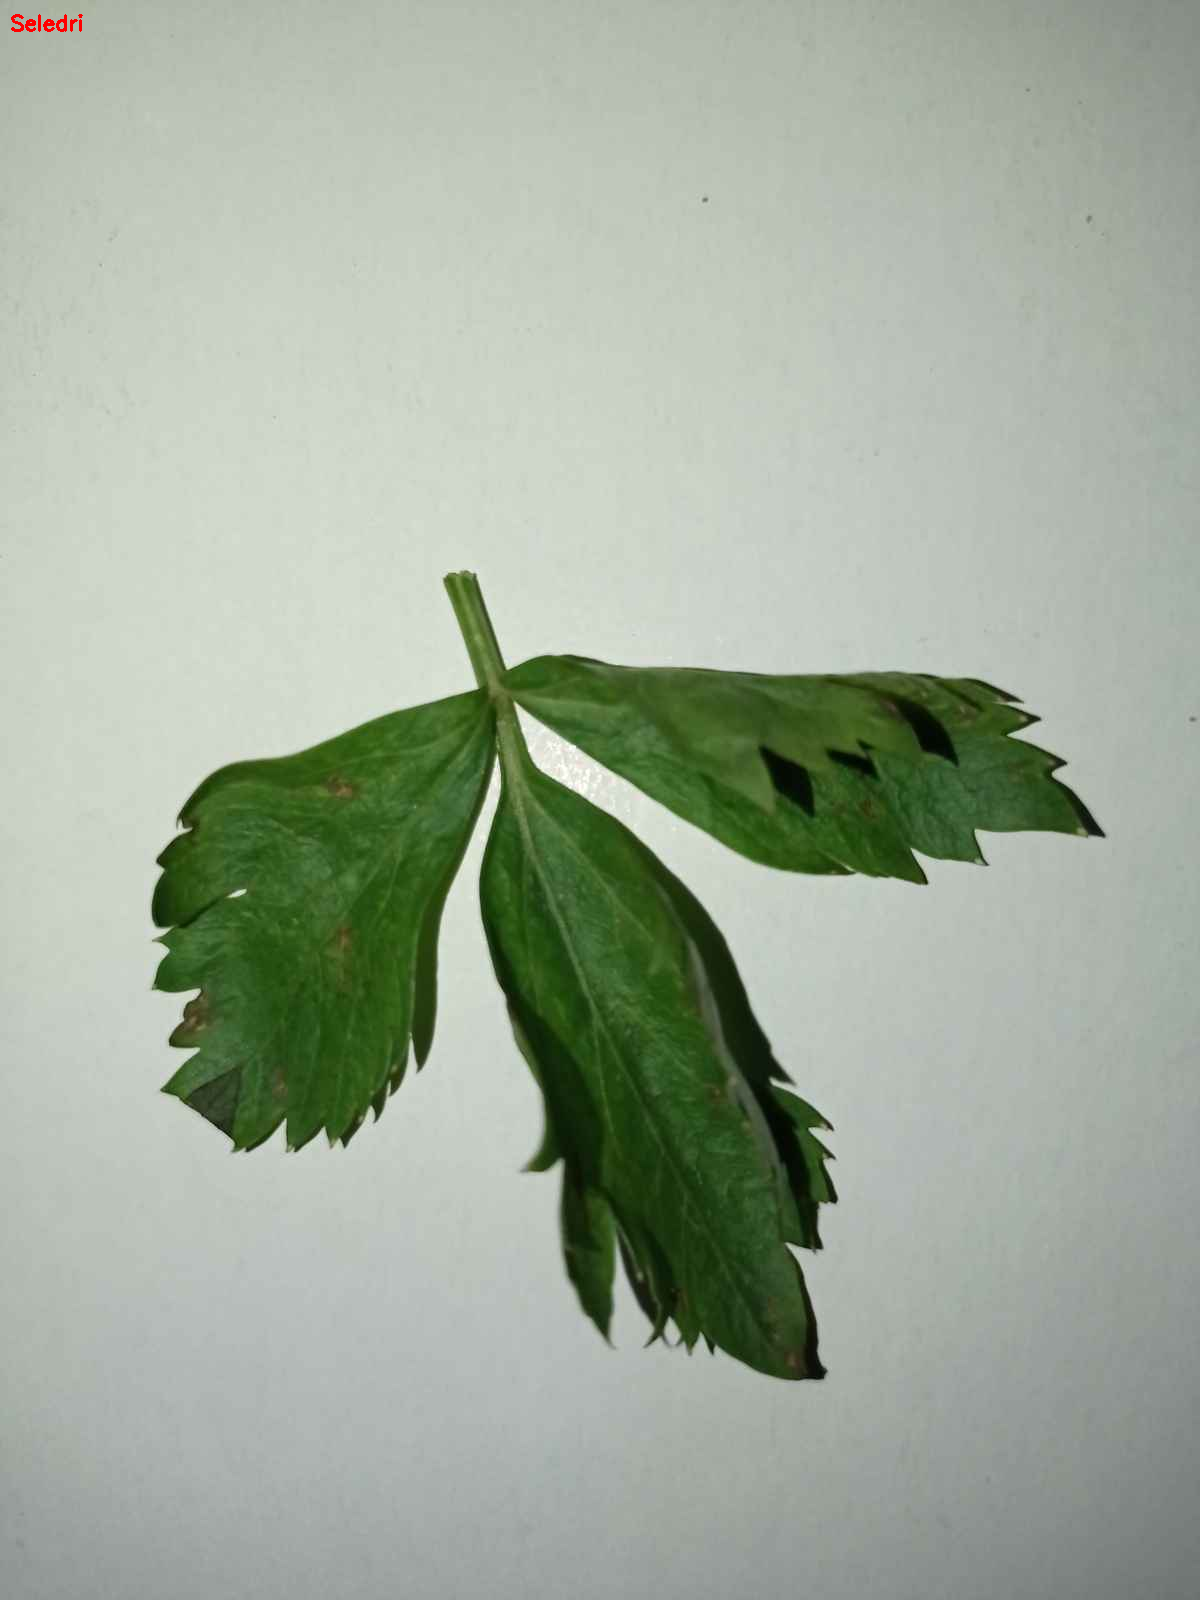

-1

In [45]:
if q_pred<=0.5 :
    target = "Pandan"
else :
    target = "Seledri"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
# cv2.imshow('Output', output)
cv2_imshow(output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol